## Demo
Loads results of test_predictions and randomly selects an image,
displays the image and the probabilities as a bargraph for demo purposes.


### Environment Setup

In [74]:
# Usual suspects
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from random import randint
import pickle

# Modeling tools
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

### Organize Test Data

In [4]:
#Instantiaate the ImageDataGenerator for the test data.
# The only thing I want to do to the test data is rescaling each pixel value to be a float between 0 and 1 
# instead of an integer between 0 and 255.

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Batch size of 32 seems popular with smallish data sets.
batch_size = 32

In [6]:
categories = ['giant hogweed', 'blueweed', 'gorse']

In [7]:
test_generator = test_datagen.flow_from_directory(
                                                  'data/final_BC_images/test/',
                                                  target_size=(32, 32),
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 1632 images belonging to 3 classes.


In [8]:
test_stepsize = test_generator.samples//test_generator.batch_size
print(f'The test set stepsize is: {test_stepsize}')

The test set stepsize is: 51


In [10]:
# Getting the true class labels for the test set
test_true = test_generator.classes

# Sanity check 
test_true

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [56]:
# Load test results list
with open('VGG_Fine_Tuning_Predictions.pkl', 'rb') as file:
    test_predictions = pickle.load(file)

In [61]:
len(test_predictions)

1632

In [68]:
# Load test_probas
with open('VGG_Fine_Tuning_Probas.pkl', 'rb') as file2:
    test_probas = pickle.load(file2)

In [69]:
len(test_probas)

1632

In [58]:
# Displaying the classification report for the test set
print('Classification Report\n \n', classification_report(test_true, test_predictions, target_names=categories))

Classification Report
 
                precision    recall  f1-score   support

giant hogweed       0.92      0.99      0.95       506
     blueweed       0.97      0.96      0.97       523
        gorse       0.98      0.94      0.96       603

     accuracy                           0.96      1632
    macro avg       0.96      0.96      0.96      1632
 weighted avg       0.96      0.96      0.96      1632



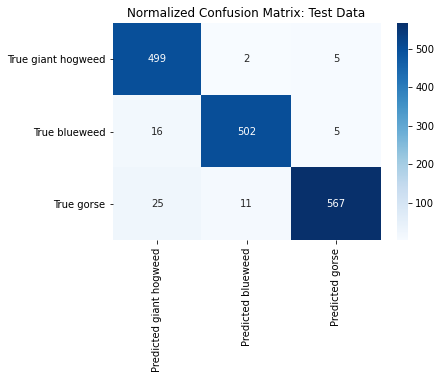

In [59]:
# Get a confusion matrix 
test_matrix = pd.DataFrame(confusion_matrix(test_true, test_predictions), 
                           columns=['Predicted ' + cat_name for cat_name in categories], 
                           index=['True ' + cat_name for cat_name in categories])

# Plotting as a heatmap 
plt.figure()
sns.heatmap(test_matrix, cmap='Blues', annot=True, fmt='g')
plt.title('Normalized Confusion Matrix: Test Data')
plt.show()

### Next Steps:
* Pull in a list of all test images and converts them to numpy arrays.
* Create a function that:
    1. Randomly chooses an index value between 0 and 1632.
    2. Displays the image and the probabilities.
    3. The function will not take any arguments.

In [62]:
# Set the directory path to the test images.
data_dir = '/home/ksawczuk/python-repo/InvasiveId/data/final_BC_images/test/'
# classes contains the name of the test subdirectories
classes = ['class_0', 'class_1', 'class_2']
# Set the image size to display.
img_size = 32

In [206]:
# Function to create a list of image tensors.
testing_data = []
def create_testing_data():
    for i, class_name in enumerate(classes):
        path = os.path.join(data_dir, class_name)
        class_num = classes.index(class_name)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
#             new_array = cv2.resize(img_array, (img_size, img_size))
            testing_data.append([img_array, class_num])
    return testing_data

In [207]:
# Call to create_testing_data()
test_data = create_testing_data()

In [208]:
# Create X_test and y_test img array lists.
X_test = []
y_test = []
for features, label_data in test_data:
    X_test.append(features)
    y_test.append(label_data)

In [ ]:
# X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [ ]:
# y_test= np.array(y_test)

In [ ]:
# # Normalize the X data
# X_test = X_test/255.0

In [66]:
len(X_test)

1632

In [234]:
def demo_results():
    
    pick = randint(0, 1632)
    # Set predicted class title
    if test_predictions[pick] == 0:
        title = 'Giant Hogweed'
    elif test_predictions[pick] == 1:
        title = 'Blueweed'
    else:
        title = 'Gorse'
        
    # Set true image title
    if test_true[pick] == 0:
        true_title = 'Giant Hogweed'
    elif test_true[pick] == 1:
        true_title = 'Blueweed'
    else:
        true_title = 'Gorse'
    RGB_img = cv2.cvtColor(X_test[pick], cv2.COLOR_BGR2RGB)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
    fig.suptitle(f'VGG Prediction: {title}')
    ax1.barh(categories, test_probas[pick][0:4], color='g')
    ax1.set_title('Class Probability')
    ax2.imshow(RGB_img)
    ax2.set_title(f'True: {true_title}')
    


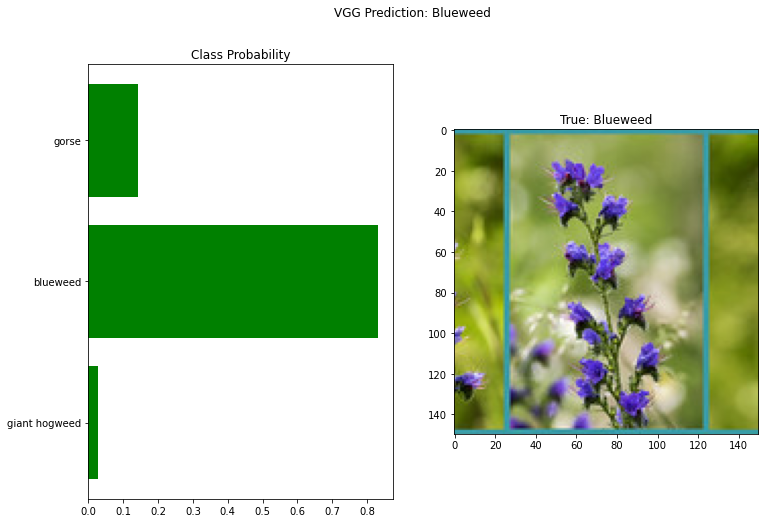

In [257]:
demo_results()